In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,f1_score
from sklearn.tree import plot_tree

rcParams['figure.figsize'] = (25, 20)

def readData(filePath: str = ""):
    df = pd.read_csv(filePath)
    return df

In [2]:
# map object data to int
traindata = readData("./MyData_New/train.csv")
traindata = traindata.drop(columns='Unnamed: 0')
# traindata.info()

# for i in traindata.Label.values:
#     if i=='objective':
#         traindata.Label.replace(i,0,inplace=True)
#     elif i=='subjective':
#         traindata.Label.replace(i,1,inplace=True)
# print(traindata.Label.value_counts())

# print(traindata['site'].value_counts())
siteDic = {}

for i in traindata.site.values:
    if isinstance(i,str):
        if i not in siteDic:
            siteDic[i]=len(siteDic)
            traindata.site.replace(i,siteDic[i],inplace=True)
    else:
        continue
print(traindata['site'].value_counts())
traindata.info()

0     244
15     46
6      30
2      23
4      17
     ... 
23      1
42      1
43      1
44      1
61      1
Name: site, Length: 62, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Label             500 non-null    object
 1   totalWordsCount   500 non-null    int64 
 2   JJS               500 non-null    int64 
 3   NN                500 non-null    int64 
 4   NNS               500 non-null    int64 
 5   PDT               500 non-null    int64 
 6   RB                500 non-null    int64 
 7   RBR               500 non-null    int64 
 8   RP                500 non-null    int64 
 9   TOs               500 non-null    int64 
 10  WP                500 non-null    int64 
 11  questionmarks     500 non-null    int64 
 12  exclamationmarks  500 non-null    int64 
 13  semicolon         500 non-null    int64 
 14  colon  

In [3]:
yvar = traindata['Label'].values
xcolumn = ['totalWordsCount','JJS','NN','NNS','PDT','RB','RBR','RP',
           'TOs','WP','questionmarks','exclamationmarks','semicolon',
           'colon','ellipsis','pronouns1st','pronouns2nd','sentence1st',
           'sentencelast','txtcomplexity','site']
xvar = traindata[xcolumn].values
# print(xvar,yvar)

In [4]:
#read test set
testset = readData("./MyData_New/test.csv")
testset = testset.drop(columns='Unnamed: 0')
for i in testset.site.values:
    if isinstance(i,str):
        if i not in siteDic:
            siteDic[i] = len(siteDic)
        testset.site.replace(i,siteDic[i],inplace=True)
    else:
        continue
testY = testset.Label.values
testX = testset[xcolumn].values

In [5]:
#model
MAX_DEPTH = 1
maxacc = (0,0) #maxdepth,acc
np.random.seed(1)
while MAX_DEPTH<20:
    model = dtc(criterion = 'entropy', max_depth = MAX_DEPTH)
    model.fit(xvar,yvar)
    pred_model = model.predict(testX)
    acc = accuracy_score(testY, pred_model)
    if acc>maxacc[1]:
        maxacc = (MAX_DEPTH,acc)
    print('Accuracy of the model is {:.4%}'.format(acc))
    MAX_DEPTH+=1
print("Best depth:",maxacc[0])

Accuracy of the model is 73.6000%
Accuracy of the model is 83.4000%
Accuracy of the model is 81.0000%
Accuracy of the model is 81.2000%
Accuracy of the model is 79.6000%
Accuracy of the model is 79.2000%
Accuracy of the model is 75.2000%
Accuracy of the model is 74.6000%
Accuracy of the model is 75.8000%
Accuracy of the model is 72.6000%
Accuracy of the model is 72.8000%
Accuracy of the model is 71.2000%
Accuracy of the model is 73.2000%
Accuracy of the model is 72.0000%
Accuracy of the model is 72.6000%
Accuracy of the model is 73.8000%
Accuracy of the model is 73.6000%
Accuracy of the model is 74.0000%
Accuracy of the model is 72.4000%
Best depth: 2


Accuracy of the model is 83.4000%
Precision of the model is 76.5351%
F1 of the model is 76.9156%


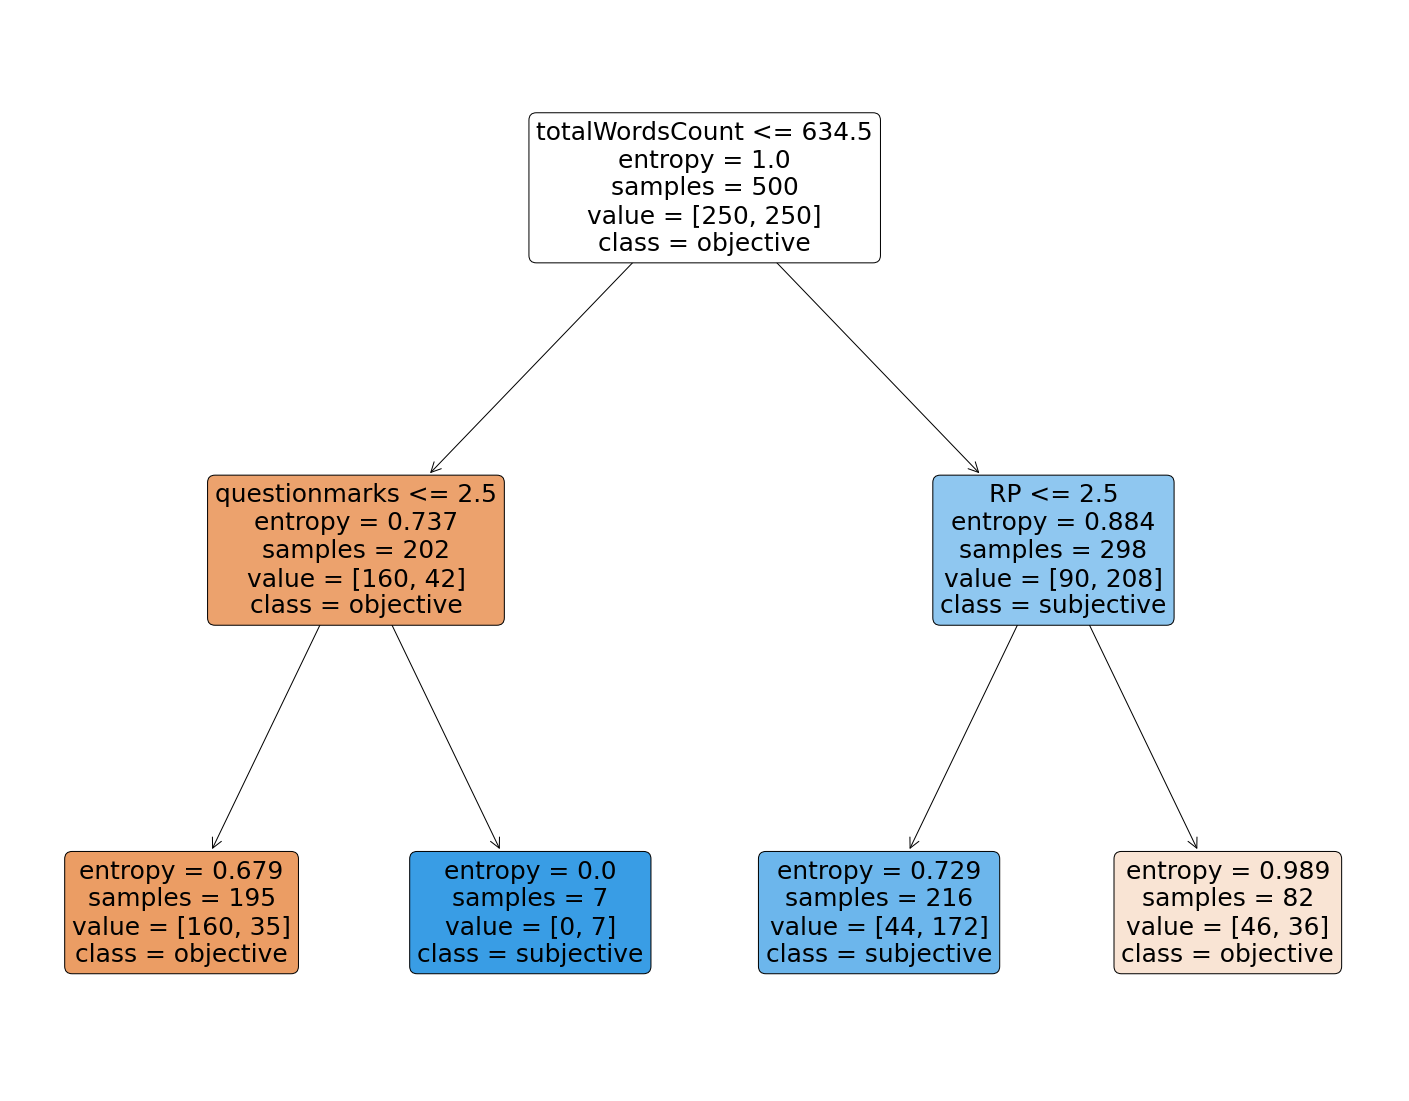

In [7]:
def analresult(real,pred):
    acc = accuracy_score(y_true=real, y_pred=pred)
    print('Accuracy of the model is {:.4%}'.format(acc))
    precision = precision_score(y_true=real, y_pred=pred, average="macro")
    print('Precision of the model is {:.4%}'.format(precision))
    f1 = f1_score(y_true=real,y_pred=pred,average="macro")
    print('F1 of the model is {:.4%}'.format(f1))

np.random.seed(1)
MAX_DEPTH = 2
model = dtc(criterion = 'entropy', max_depth = MAX_DEPTH)
model.fit(xvar,yvar)
# traindata.info()

pred_model = model.predict(testX)
analresult(testY,pred_model)

feature_names = traindata.columns[1:]
target_names = traindata['Label'].unique().tolist()

plot_tree(model,
          max_depth=MAX_DEPTH,
          feature_names = feature_names,
          class_names = target_names,
          filled = True,
          rounded = True)

plt.savefig('tree_visualization.png')